In [15]:
#import
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image, ImageOps
from skimage import exposure

%matplotlib inline


(128, 128)


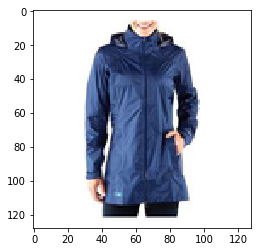

In [37]:
img_path = "gear_images/test_images/101634-Copy1.jpeg"
x = plt.imread(img_path)
#x.shape
idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )
#print(idealSize)

pad = x.shape[0] - x.shape[1]

padX = idealSize - x.shape[0]
padY = idealSize - x.shape[1]

padx_before = padX//2
padx_after=  idealSize - padx_before - x.shape[0]

pady_before = padY//2
pady_after = idealSize - pady_before - x.shape[1]

newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

x = Image.fromarray(newArr)
y = x.resize((128,128), Image.ANTIALIAS)

print(y.size)
plt.imshow(y)



(array([ 1888.,  3541.,  3740.,  3387.,  2553.,  1393.,  1171.,   574.,
          370., 30535.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

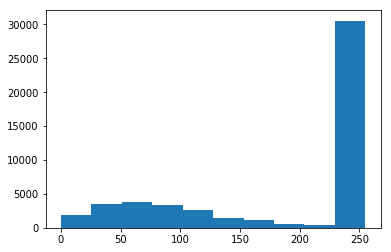

In [38]:
y=np.asarray(y)
plt.hist(y.flatten())

In [19]:
y.shape

(128, 128, 3)

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [43]:
# Option 1:
# y_eq = exposure.equalize_hist(y)

# Option 2:
# for i in range(3):
#     y_eq[:,:,i] = exposure.equalize_hist(y[:,:,i])

# Option 3:
y_eq = exposure.equalize_adapthist(y, cliplimit=0.03)
#y_eq = exposure.equalize_adapthist(y)


/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


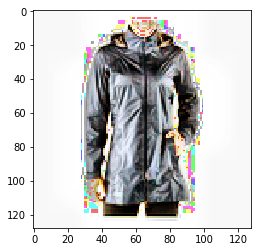

In [34]:
plt.imshow(y)

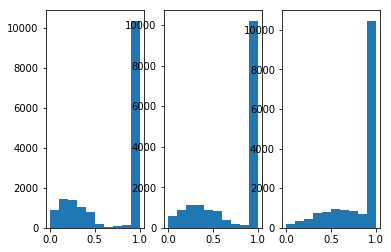

In [44]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(y_eq[:,:,i].flatten())
plt.show()

In [45]:
print(os.getcwd())
directory=''
for filename in os.listdir(directory):
    if filename.endswith(".asm") or filename.endswith(".py"): 
        # print(os.path.join(directory, filename))
        continue
    else:
        continue

/home/destroyer/notebooks/Hackathon


In [ ]:
labels=['a', 'b']
np.eye(labels)